In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-02-22 07:33:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-22 07:33:09 (72.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 10.94 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os

In [ ]:
filenames = [data_dir + filename for filename in os.listdir(data_dir)]

In [ ]:
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [ ]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_lines_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_lines_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')

        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_lines_split) -1

        abstract_samples.append(line_data)
    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
%%time

train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

CPU times: user 717 ms, sys: 190 ms, total: 908 ms
Wall time: 3.91 s


In [ ]:
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(val_samples)

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


<Axes: ylabel='Frequency'>

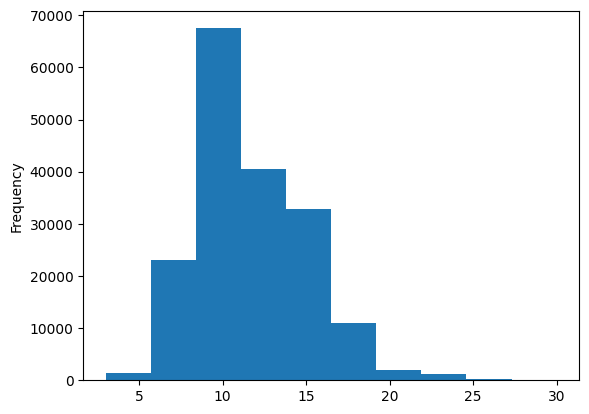

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

In [ ]:
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30212)

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.6.1'

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [ ]:
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

In [ ]:
train_labels_one_hot, val_labels_one_hot, test_labels_one_hot

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]))

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_endoder = label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels_encoder = label_encoder.fit_transform(test_df["target"].to_numpy())

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [ ]:
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# Model 0: Baseline ( Naive Bayes Classifier )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

In [ ]:
model_0.fit(
  X=train_sentences,
  y=train_labels_encoded
)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(
    X=val_sentences,
    y= val_labels_endoder
)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
baseline_results = calculate_results(val_labels_endoder, baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# Tokenize And Embedding The Data

In [ ]:
import numpy as np
import tensorflow as tf
import tf_keras as keras
from tf_keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)

avg_sent_len

26.338269273494777

In [ ]:
import matplotlib.pyplot as plt

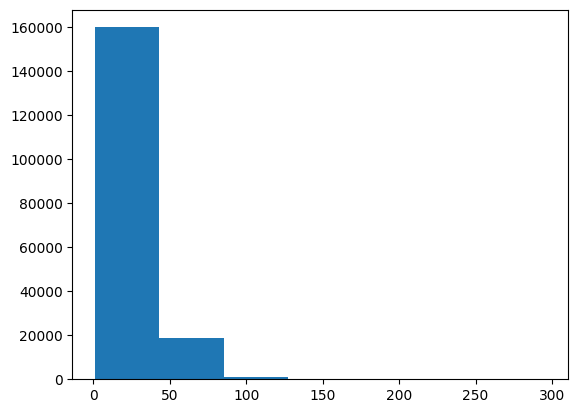

In [ ]:
plt.hist(sent_lens, bins=7);

In [ ]:
output_seq_len= int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
max_tokens = 68000

In [ ]:
from tf_keras.layers import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=output_seq_len,

)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random

In [ ]:
target_sentence = random.choice(train_sentences)
print(target_sentence)
print('\n')
print(len(target_sentence.split()))
print('\n')
print(text_vectorizer([target_sentence]))

the home arm was less costly but less effective at @ days and was dominating ( less costly and more effective ) at @ days .


26


tf.Tensor(
[[    2   548   207    10   211  3951    72   211   137    15    84     3
     10 26790   211  3951     3    69   137    15    84     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)


In [ ]:
text_vocab = text_vectorizer.get_vocabulary()
len(text_vocab), text_vocab[:5], text_vocab[-5:]

(64841,
 ['', '[UNK]', 'the', 'and', 'of'],
 ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp'])

In [ ]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
token_embed = layers.Embedding(
    input_dim = len(text_vocab),
    output_dim = 128,
    mask_zero = True,
    name = "token_embedding"
)

In [ ]:
print(target_sentence)
print(text_vectorizer([target_sentence]))
print(token_embed(text_vectorizer([target_sentence])))

the home arm was less costly but less effective at @ days and was dominating ( less costly and more effective ) at @ days .
tf.Tensor(
[[    2   548   207    10   211  3951    72   211   137    15    84     3
     10 26790   211  3951     3    69   137    15    84     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)
tf.Tensor(
[[[-0.01325401 -0.04233081  0.00885519 ...  0.01783656  0.04913871
   -0.03833476]
  [ 0.02442256 -0.01309565 -0.04624919 ... -0.02052501 -0.0312469
    0.03373561]
  [-0.03812213 -0.03308254  0.00413107 ... -0.0290576   0.00025768
    0.04997759]
  ...
  [ 0.01536113  0.0367813  -0.04103523 ... -0.03102866 -0.04622756
    0.00024942]
  [ 0.01536113  0.0367813  -0.04103523 ... -0.03102866 -0.04622756
    0.00024942]
  [ 0.01536113  0.0367813  -0.04103523 ... -0.03102866 -0.04622

# Creating Datasets

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

# Model 1: Conv 1D With Token Embedding

In [ ]:
inputs = layers.Input(shape=(1, ), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embedding = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding="same", activation="relu")(token_embedding)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_1 = keras.Model(inputs, outputs)

In [ ]:
model_1.compile(
    loss="categorical_crossentropy",
    optimizer = keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [ ]:
history_model_1 = model_1.fit(
    train_dataset,
    steps_per_epoch=int(0.1 * len(train_dataset)),
    epochs = 3,
    validation_data = val_dataset,
    validation_steps=int(0.1 * len(val_dataset))
)

Epoch 1/3
562/562 [==============================] - 73s 127ms/step - loss: 0.9182 - accuracy: 0.6361 - val_loss: 0.6907 - val_accuracy: 0.7347
Epoch 2/3
562/562 [==============================] - 74s 132ms/step - loss: 0.6580 - accuracy: 0.7564 - val_loss: 0.6325 - val_accuracy: 0.7723
Epoch 3/3
562/562 [==============================] - 71s 126ms/step - loss: 0.6159 - accuracy: 0.7761 - val_loss: 0.5963 - val_accuracy: 0.7846


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5967 - accuracy: 0.7877


[0.5967119932174683, 0.7877002358436584]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs

945/945 [==============================] - 6s 6ms/step


array([[4.4073340e-01, 1.7090867e-01, 7.4954472e-02, 2.8706667e-01,
        2.6336776e-02],
       [4.6146375e-01, 2.6032078e-01, 1.3947782e-02, 2.5532523e-01,
        8.9424364e-03],
       [1.5000470e-01, 1.0624833e-02, 1.5899532e-03, 8.3772629e-01,
        5.4202927e-05],
       ...,
       [4.2541728e-06, 7.5164775e-04, 6.7507738e-04, 2.6516248e-06,
        9.9856645e-01],
       [5.0120234e-02, 4.3367353e-01, 1.2353682e-01, 5.7339281e-02,
        3.3533013e-01],
       [1.7059563e-01, 6.9920212e-01, 3.9051160e-02, 3.7238926e-02,
        5.3912282e-02]], dtype=float32)

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results = calculate_results(val_labels_endoder, model_1_preds)
model_1_results

{'accuracy': 78.77002515556732,
 'precision': 0.7842940170475505,
 'recall': 0.7877002515556732,
 'f1': 0.7851148277977572}

# Model 2: Feature Extractition With Transfer Learning

In [ ]:
import tensorflow_hub as hub

In [ ]:
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)

In [ ]:
random_train_sentence = random.choice(train_sentences)
print(random_train_sentence)
print('\n')
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(use_embedded_sentence)

viral breakthrough occurred in @ % ( smv@ ) and @ % ( smv@ ) of prior non-responders ; no viral breakthrough occurred in prior relapsers .


tf.Tensor(
[[ 0.03451431  0.03811039 -0.032428   -0.07509403 -0.04559007  0.08191071
   0.0816267   0.04318034  0.01862924  0.04121079  0.02235186  0.06344967
   0.05089233  0.07184621  0.06106384 -0.0653767  -0.0205691  -0.07093802
   0.05253236  0.02426315 -0.04264792  0.02038607 -0.07393102  0.06690671
   0.03473047  0.07980987  0.02376566 -0.06655803 -0.01189244 -0.0275422
   0.06898127  0.02347137 -0.00455458 -0.00504438  0.04821653  0.0386275
  -0.06614183 -0.03872898 -0.03075526  0.05646857 -0.02627879 -0.03173555
   0.0593982  -0.03969618  0.05283803  0.01601675  0.05192796  0.06127043
  -0.00125556  0.03794187 -0.0737894  -0.04246459 -0.06701193 -0.03667493
  -0.0745182  -0.05723791  0.00727307 -0.00685018  0.07564071  0.0429204
  -0.06271457  0.05378256  0.03078046  0.04236725 -0.03280144 -0.07039472
   0.04120832  0.06264637  0.06070652

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embeding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embeding)
outputs = layers.Dense(5, activation="softmax")(x)

model_2 = keras.Model(inputs, outputs)

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_2.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics = ["accuracy"]
)

In [ ]:
history_model_2 = model_2.fit(
    train_dataset,
    epochs = 5,
    steps_per_epoch = int(0.1 * len(train_dataset)),
    validation_data = val_dataset,
    validation_steps = int(0.1 * len(val_dataset))
)

Epoch 1/5
562/562 [==============================] - 13s 16ms/step - loss: 0.9202 - accuracy: 0.6489 - val_loss: 0.7970 - val_accuracy: 0.6905
Epoch 2/5
562/562 [==============================] - 9s 15ms/step - loss: 0.7693 - accuracy: 0.7015 - val_loss: 0.7554 - val_accuracy: 0.7051
Epoch 3/5
562/562 [==============================] - 10s 17ms/step - loss: 0.7527 - accuracy: 0.7111 - val_loss: 0.7397 - val_accuracy: 0.7108
Epoch 4/5
562/562 [==============================] - 8s 14ms/step - loss: 0.7175 - accuracy: 0.7251 - val_loss: 0.7102 - val_accuracy: 0.7307
Epoch 5/5
562/562 [==============================] - 9s 16ms/step - loss: 0.7244 - accuracy: 0.7223 - val_loss: 0.6881 - val_accuracy: 0.7360


In [ ]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.6960 - accuracy: 0.7356


[0.695963978767395, 0.7356017231941223]

In [ ]:
model_2_pred_probs = model_2.predict(val_dataset)

945/945 [==============================] - 11s 11ms/step


In [ ]:
model_2_pred_probs

array([[6.39980435e-01, 2.28013366e-01, 2.62570777e-03, 1.18688740e-01,
        1.06915971e-02],
       [4.74051327e-01, 4.15060610e-01, 5.09332959e-03, 1.03577286e-01,
        2.21735891e-03],
       [3.86880666e-01, 7.08986372e-02, 4.98515479e-02, 4.46426809e-01,
        4.59423847e-02],
       ...,
       [1.34458940e-03, 1.41743757e-03, 7.32935145e-02, 5.21554553e-04,
        9.23422873e-01],
       [3.46599636e-03, 2.25012805e-02, 4.54967201e-01, 1.11786311e-03,
        5.17947674e-01],
       [1.56443492e-01, 4.36901122e-01, 3.59187007e-01, 3.15951044e-03,
        4.43087779e-02]], dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_2_results = calculate_results(val_labels_endoder, model_2_preds)

In [ ]:
model_2_results

{'accuracy': 73.56017476499404,
 'precision': 0.7315671995713069,
 'recall': 0.7356017476499405,
 'f1': 0.7298927767908356}

# Model 3: Conv 1D With Character Embedding

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
split_chars(random_train_sentence)

'v i r a l   b r e a k t h r o u g h   o c c u r r e d   i n   @   %   (   s m v @   )   a n d   @   %   (   s m v @   )   o f   p r i o r   n o n - r e s p o n d e r s   ;   n o   v i r a l   b r e a k t h r o u g h   o c c u r r e d   i n   p r i o r   r e l a p s e r s   .'

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
char_length  = [len(sentence) for sentence in train_sentences]
mean_char_length  = np.mean(char_length)

In [ ]:
mean_char_length

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

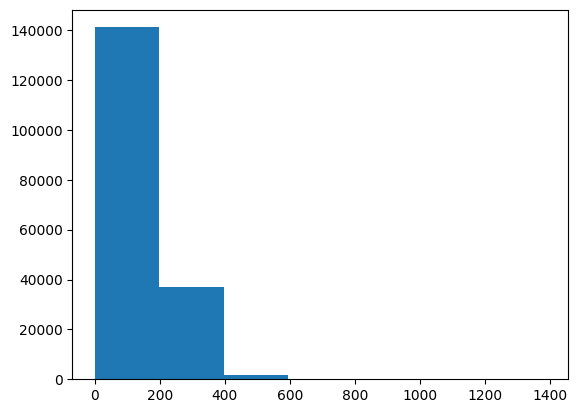

In [ ]:
plt.hist(char_length, bins =7)

In [ ]:
output_seq_char_len = int(np.percentile(char_length, 95))

In [ ]:
output_seq_char_len

290

In [ ]:
import string

In [ ]:
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2

In [ ]:
char_vectorizer = TextVectorization(
  max_tokens =NUM_CHAR_TOKENS,
  output_sequence_length = output_seq_char_len,
)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
len(char_vocab), char_vocab[:5], char_vocab[-5:]

(28, ['', '[UNK]', 'e', 't', 'i'], ['k', 'x', 'z', 'q', 'j'])

In [ ]:
random_train_chars = random.choice(train_chars)

print(random_train_chars)
print(len(random_train_chars))
print(char_vectorizer([random_train_chars]))

t o p i c a l   t r e t i n o i n   i s   c o m m o n l y   p r e s c r i b e d   ,   b u t   i t s   f r e q u e n t   a d v e r s e   e f f e c t s   a r e   b a r r i e r s   t o   u s e   .
193
tf.Tensor(
[[ 3  7 14  4 11  5 12  3  8  2  3  4  6  7  4  6  4  9 11  7 15 15  7  6
  12 19 14  8  2  9 11  8  4 22  2 10 22 16  3  4  3  9 17  8  2 26 16  2
   6  3  5 10 21  2  8  9  2  2 17 17  2 11  3  9  5  8  2 22  5  8  8  4
   2  8  9  3  7 16  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [ ]:
char_embed = layers.Embedding(
    input_dim= len(char_vocab),
    output_dim = 25,
    mask_zero = True
)

In [ ]:
print(random_train_chars)
print(char_vectorizer([random_train_chars]))
print(char_embed(char_vectorizer([random_train_chars])))

t o p i c a l   t r e t i n o i n   i s   c o m m o n l y   p r e s c r i b e d   ,   b u t   i t s   f r e q u e n t   a d v e r s e   e f f e c t s   a r e   b a r r i e r s   t o   u s e   .
tf.Tensor(
[[ 3  7 14  4 11  5 12  3  8  2  3  4  6  7  4  6  4  9 11  7 15 15  7  6
  12 19 14  8  2  9 11  8  4 22  2 10 22 16  3  4  3  9 17  8  2 26 16  2
   6  3  5 10 21  2  8  9  2  2 17 17  2 11  3  9  5  8  2 22  5  8  8  4
   2  8  9  3  7 16  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
inputs = layers.Input(shape=(1, ), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding="same", activation = "relu")(char_embeddings)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)

model_3 = keras.Model(inputs, outputs)

In [ ]:
model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

In [ ]:
model_3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 290)               0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 290, 25)           700       
                                                                 
 conv1d_5 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_6 (Dense)             (None, 5)                 325 

In [ ]:
history_model_3 = model_3.fit(
    train_char_dataset,
    steps_per_epoch = int(0.1 * len(train_char_dataset)),
    epochs = 3,
    validation_data = val_char_dataset,
    validation_steps = (0.1 * len(val_char_dataset))
)

Epoch 1/3
562/562 [==============================] - 13s 22ms/step - loss: 1.2494 - accuracy: 0.4874 - val_loss: 1.1189 - val_accuracy: 0.5391
Epoch 2/3
562/562 [==============================] - 12s 22ms/step - loss: 1.0843 - accuracy: 0.5559 - val_loss: 1.0188 - val_accuracy: 0.5885
Epoch 3/3
562/562 [==============================] - 13s 23ms/step - loss: 1.0062 - accuracy: 0.5988 - val_loss: 0.9602 - val_accuracy: 0.6178


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 10s 10ms/step


array([[0.11215749, 0.28120494, 0.35608205, 0.2067808 , 0.04377463],
       [0.18271469, 0.3008927 , 0.05360535, 0.43432677, 0.0284605 ],
       [0.09923492, 0.20469679, 0.24508648, 0.3643854 , 0.08659653],
       ...,
       [0.01326688, 0.05081289, 0.15395623, 0.01882884, 0.76313514],
       [0.0312342 , 0.16942987, 0.4747216 , 0.0630985 , 0.2615158 ],
       [0.3867746 , 0.34594592, 0.14575636, 0.06973721, 0.05178592]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis = 1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([2, 3, 3, ..., 4, 2, 0])>

In [ ]:
model_3_results = calculate_results(val_labels_endoder, model_3_preds)
model_3_results

{'accuracy': 61.591420627565206,
 'precision': 0.621460160687323,
 'recall': 0.6159142062756521,
 'f1': 0.6077884833618518}

# Model 4: Transfer Learning With Character Embedding

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labes = tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,  train_char_token_labes))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labes = tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data,  val_char_token_labes))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labes = tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data,  test_char_token_labes))

test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset, test_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
token_inputs = layers.Input(shape = [], dtype=tf.string, name="token_input")
token_embedding = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embedding)

token_model = keras.Model(inputs=token_inputs, outputs=token_outputs)

In [ ]:
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)

char_model = keras.Model(inputs=char_inputs, outputs=char_bi_lstm)

In [ ]:
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

In [ ]:
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation = "softmax")(final_dropout)

In [ ]:
model_4 = keras.Model(
    inputs=[token_model.input, char_model.input],
    outputs = output_layer,
    name="model_4_token_and_char_embedding"
    )

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 290)                  0         ['char_input[0][0]']          
 Vectorization)                                                                                   
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978  

In [ ]:
from tf_keras.utils import plot_model

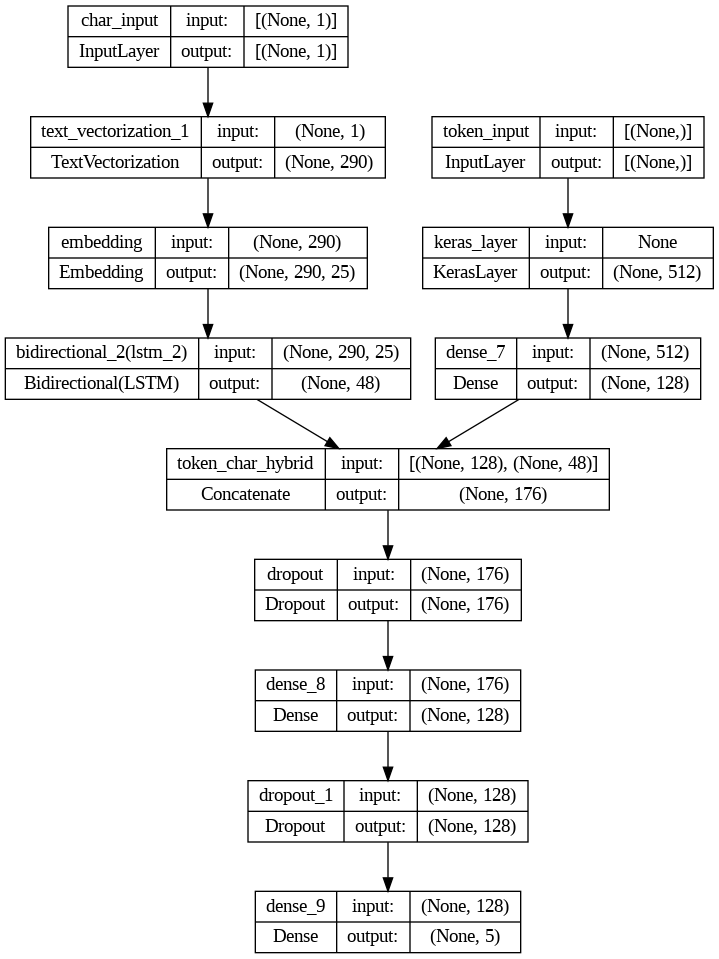

In [ ]:
plot_model(model_4, show_shapes=True)

In [ ]:
model_4.compile(
    loss = "categorical_crossentropy",
    optimizer = keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_model_4 = model_4.fit(
    train_char_token_dataset,
    steps_per_epoch = int(0.1 * len(train_char_token_dataset)),
    epochs = 3,
    validation_data = val_char_token_dataset,
    validation_steps = int(0.1 * len(val_char_token_dataset))
)

Epoch 1/3
562/562 [==============================] - 187s 309ms/step - loss: 0.9908 - accuracy: 0.6062 - val_loss: 0.7813 - val_accuracy: 0.6975
Epoch 2/3
562/562 [==============================] - 173s 307ms/step - loss: 0.8026 - accuracy: 0.6896 - val_loss: 0.7284 - val_accuracy: 0.7251
Epoch 3/3
562/562 [==============================] - 173s 308ms/step - loss: 0.7806 - accuracy: 0.7047 - val_loss: 0.6957 - val_accuracy: 0.7340


In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 70s 68ms/step


array([[4.1813326e-01, 3.7884104e-01, 4.2754291e-03, 1.9202898e-01,
        6.7212181e-03],
       [3.3726576e-01, 4.6804354e-01, 3.3929234e-03, 1.8988326e-01,
        1.4144828e-03],
       [2.8939873e-01, 1.8984102e-01, 5.6345828e-02, 4.2054456e-01,
        4.3869853e-02],
       ...,
       [4.3469513e-04, 6.3976655e-03, 3.9024450e-02, 2.1938999e-04,
        9.5392376e-01],
       [9.9827033e-03, 7.2923802e-02, 2.3048884e-01, 5.9726038e-03,
        6.8063205e-01],
       [2.4080312e-01, 2.7621490e-01, 3.8276270e-01, 2.8530357e-02,
        7.1689017e-02]], dtype=float32)

In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs, axis = 1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_4_results = calculate_results(val_labels_endoder, model_4_preds)
model_4_results

{'accuracy': 73.10009267840594,
 'precision': 0.7328024059226468,
 'recall': 0.7310009267840594,
 'f1': 0.7274777817816046}

# Model 5: Transfer Learning With Token Embedding + Character Embedding + Position Embedding

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
train_df["line_number"].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

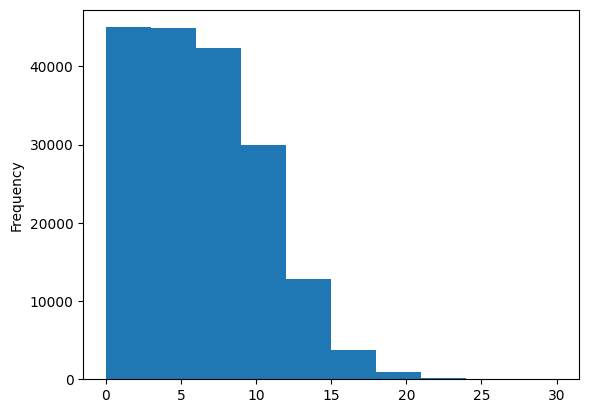

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth =15)

In [ ]:
train_line_numbers_one_hot

<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
train_df["total_lines"].value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464


<Axes: ylabel='Frequency'>

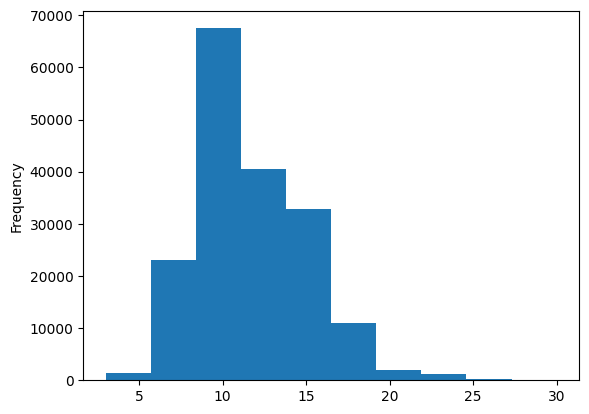

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

In [ ]:
train_total_lines_one_hot

<tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((
    train_line_numbers_one_hot,
    train_total_lines_one_hot,
    train_sentences,
    train_chars
))

train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)

train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((
    val_line_numbers_one_hot,
    val_total_lines_one_hot,
    val_sentences,
    val_chars
))

val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)

val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((
    test_line_numbers_one_hot,
    test_total_lines_one_hot,
    test_sentences,
    test_chars
))

test_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)

test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data, test_char_token_pos_labels))
test_char_token_pos_dataset = test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_dataset, val_char_token_pos_dataset, test_char_token_pos_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
token_inputs = layers.Input(shape=[], dtype="string", name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = "relu")(token_embeddings)

token_model = keras.Model(inputs=token_inputs, outputs = token_outputs)

In [ ]:
char_inputs = layers.Input(shape=(1, ), dtype = "string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)

char_model = keras.Model(inputs=char_inputs, outputs=char_bi_lstm)

In [ ]:
line_numbers_inputs = layers.Input(shape = (15,), dtype = tf.float32, name = "line_numbers_input")
x = layers.Dense(32, activation="relu")(line_numbers_inputs)

line_number_model = keras.Model(inputs = line_numbers_inputs, outputs= x)

In [ ]:
total_lines_input = layers.Input(shape = (20,), dtype = tf.float32, name= "toal_lines_input")
y = layers.Dense(32, activation = "relu")(total_lines_input)

total_lines_model = keras.Model(inputs = total_lines_input, outputs = y)

In [ ]:
combined_embeddings = layers.Concatenate(name="char_token_hybrid_embedding")([
  token_model.output,
  char_model.output
])

In [ ]:
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

In [ ]:
tribrid_embeddings = layers.Concatenate(name="char_token_positional_embedding")([
    line_number_model.output,
    total_lines_model.output,
    combined_embeddings,
    z
])

In [ ]:
output_layers = layers.Dense(5, activation ="softmax", name="output_layers")(tribrid_embeddings)

In [ ]:
model_5 = keras.Model(
    inputs = [
        line_number_model.input,
        total_lines_model.input,
        token_model.input,
        char_model.input
        ],
    outputs = output_layers
)

In [ ]:
model_5.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 290)                  0         ['char_inputs[0][0]']         
 Vectorization)                                                                                   
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978   ['token_input[0][0]']  

In [ ]:
from tf_keras.utils import plot_model

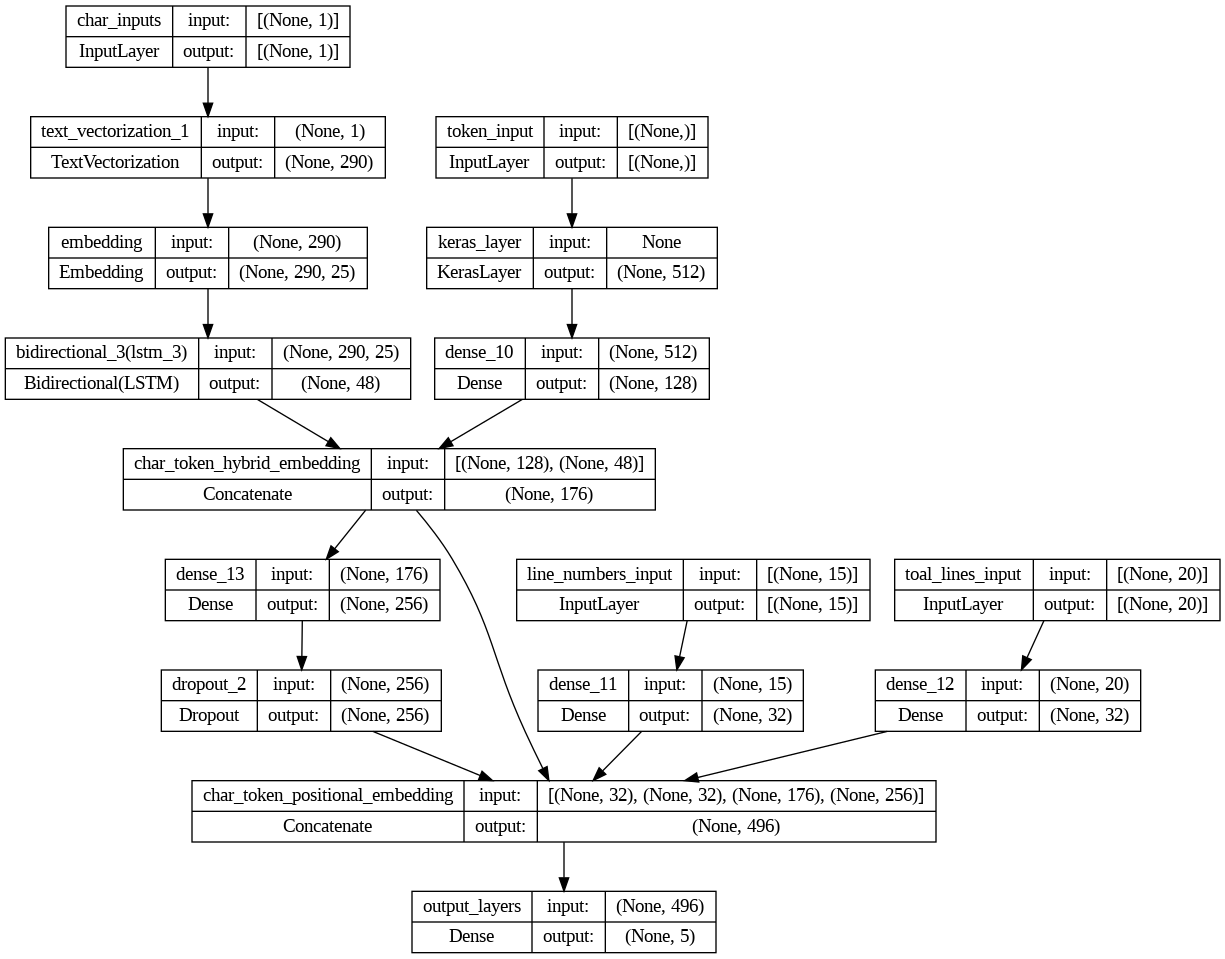

In [ ]:
plot_model(model_5, show_shapes=True)

In [ ]:
model_5.compile(
    loss= keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer = keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_model_5 = model_5.fit(
    train_char_token_pos_dataset,
    steps_per_epoch = int(0.1 * len(train_char_token_pos_dataset)),
    epochs = 3,
    validation_data = val_char_token_pos_dataset,
    validation_steps= int(0.1 * len(val_char_token_pos_dataset))
)

Epoch 1/3
562/562 [==============================] - 201s 332ms/step - loss: 1.0818 - accuracy: 0.7370 - val_loss: 0.9801 - val_accuracy: 0.8102
Epoch 2/3
562/562 [==============================] - 173s 307ms/step - loss: 0.9645 - accuracy: 0.8170 - val_loss: 0.9503 - val_accuracy: 0.8265
Epoch 3/3
562/562 [==============================] - 201s 358ms/step - loss: 0.9488 - accuracy: 0.8259 - val_loss: 0.9397 - val_accuracy: 0.8338


In [ ]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset)
model_5_pred_probs

945/945 [==============================] - 93s 93ms/step


array([[0.51997495, 0.13005382, 0.01495804, 0.3186957 , 0.01631751],
       [0.5627031 , 0.09934738, 0.03390437, 0.2959968 , 0.0080483 ],
       [0.30230182, 0.11534424, 0.14165342, 0.3614231 , 0.07927725],
       ...,
       [0.03547325, 0.09811521, 0.03392684, 0.02850614, 0.80397856],
       [0.03387155, 0.31797174, 0.06058767, 0.02939879, 0.5581702 ],
       [0.20803258, 0.5950327 , 0.0857478 , 0.03530477, 0.07588217]],
      dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis = 1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5_results = calculate_results(val_labels_endoder, model_5_preds)
model_5_results

{'accuracy': 83.43373493975903,
 'precision': 0.8334721016235358,
 'recall': 0.8343373493975904,
 'f1': 0.8333001735293655}

# Compare All The Model Results

In [ ]:
all_model_results = pd.DataFrame({
    "0_baseline": baseline_results,
    "1_custom_token_embedding": model_1_results,
    "2_pretrained_token_embedding": model_2_results,
    "3_char_embedding": model_3_results,
    "4_hybrid_char_token_embedding": model_4_results,
    "5_pos_char_token_embedding": model_5_results
})

In [ ]:
all_model_results  =all_model_results.transpose()

In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"] / 100

In [ ]:
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.721832,0.718647,0.721832,0.698925
1_custom_token_embedding,0.787700,0.784294,0.787700,0.785115
2_pretrained_token_embedding,0.735602,0.731567,0.735602,0.729893
3_char_embedding,0.615914,0.621460,0.615914,0.607788
4_hybrid_char_token_embedding,0.731001,0.732802,0.731001,0.727478
5_pos_char_token_embedding,0.834337,0.833472,0.834337,0.833300


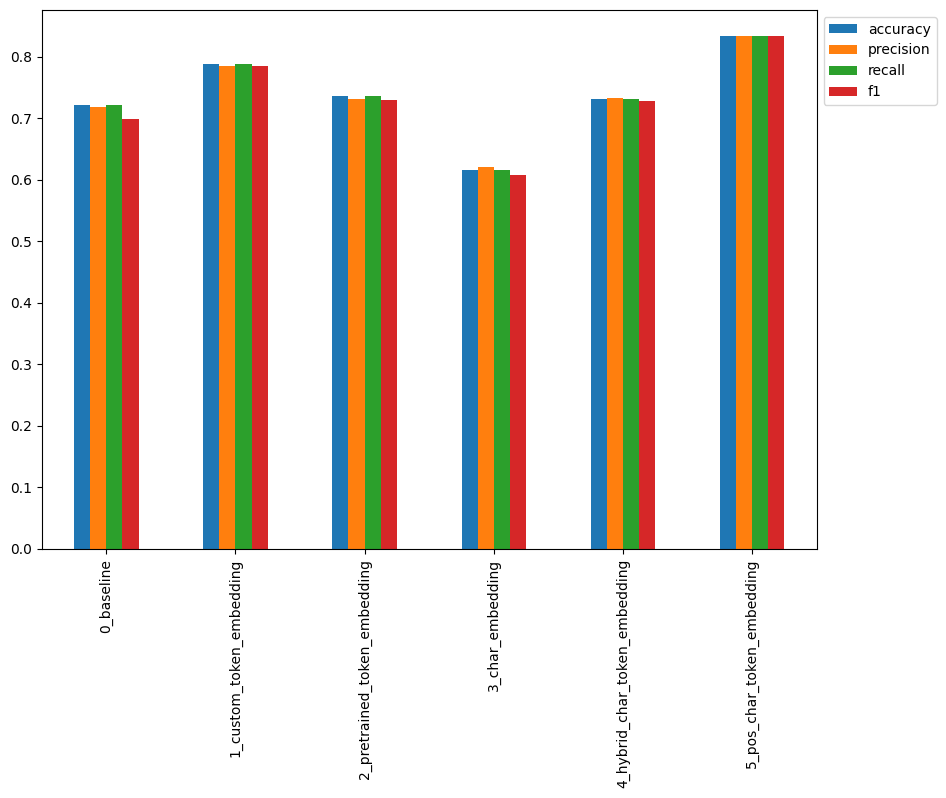

In [ ]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor = (1.0, 1.0) )

# Save And Load Best Performance Model

In [ ]:
model_5.save("skimlit")

In [ ]:
loaded_model = keras.models.load_model("skimlit")

In [ ]:
loaded_pred_probs = loaded_model.predict(test_char_token_pos_dataset)

945/945 [==============================] - 75s 72ms/step


In [ ]:
loaded_pred_probs

array([[0.51997495, 0.13005382, 0.01495804, 0.3186957 , 0.01631751],
       [0.5627031 , 0.09934738, 0.03390437, 0.2959968 , 0.0080483 ],
       [0.30230182, 0.11534424, 0.14165342, 0.3614231 , 0.07927725],
       ...,
       [0.03547325, 0.09811521, 0.03392684, 0.02850614, 0.80397856],
       [0.03387155, 0.31797174, 0.06058767, 0.02939879, 0.5581702 ],
       [0.20803258, 0.5950327 , 0.0857478 , 0.03530477, 0.07588217]],
      dtype=float32)

In [ ]:
loaded_pred_probs[0]

array([0.51997495, 0.13005382, 0.01495804, 0.3186957 , 0.01631751],
      dtype=float32)

In [ ]:
loaded_preds = tf.argmax(loaded_pred_probs, axis = 1)

In [ ]:
loaded_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
loaded_model.evaluate(test_char_token_pos_dataset)

945/945 [==============================] - 73s 71ms/step - loss: 0.9388 - accuracy: 0.8343


[0.9388225674629211, 0.8343373537063599]